In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

pd.options.mode.chained_assignment = None



# Now we need to read in the data
df = pd.read_csv('/Users/zhang.mengx/Downloads/movies.csv')

In [2]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [3]:
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

name - 0%
rating - 1%
genre - 0%
year - 0%
released - 0%
score - 0%
votes - 0%
director - 0%
writer - 0%
star - 0%
country - 0%
budget - 28%
gross - 2%
company - 0%
runtime - 0%


In [4]:
# Data Types for our columns

print(df.dtypes)

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object


In [5]:
# change data type of columns

df['budget'] = pd.to_numeric(df['budget'], errors='coerce').fillna(0).astype(int)
df['gross'] = pd.to_numeric(df['gross'], errors='coerce').fillna(0).astype(int)

df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0


In [6]:
# important! format the column 'released' into column'format_released'

df['format_released'] = pd.to_datetime(df['released'].str.extract(r'(\w+ \d+, \d+)', expand=False), format='%B %d, %Y')

df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,format_released
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0,1980-06-13
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0,1980-07-02
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0,1980-06-20
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0,1980-07-02
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0,1980-07-25


In [7]:
# create correct year column

df['yearcorrect'] = df['format_released'].astype(str).str[:4]

df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,format_released,yearcorrect
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0,1980-06-13,1980
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0,1980-07-02,1980
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0,1980-06-20,1980
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0,1980-07-02,1980
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0,1980-07-25,1980


In [8]:
# Order our Data a little bit to see

df.sort_values(by=['gross'], inplace=False, ascending=False)

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,format_released,yearcorrect
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000.0,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162.0,2009-12-18,2009
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181.0,2019-04-26,2019
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000.0,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194.0,1997-12-19,1997
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000.0,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138.0,2015-12-18,2015
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149.0,2018-04-27,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1617,Mortal Passions,R,Crime,1989,"January 26, 1990 (United States)",4.5,274.0,Andrew Lane,Alan Moskowitz,Zach Galligan,United States,0,0,Gibraltar Entertainment,92.0,1990-01-26,1990
1614,Edge of Sanity,R,Horror,1989,"April 14, 1989 (United States)",5.2,1300.0,Gérard Kikoïne,J.P. Félix,Anthony Perkins,United Kingdom,0,0,Allied Vision,85.0,1989-04-14,1989
1606,"I, Madman",R,Fantasy,1989,"April 7, 1989 (United States)",6.0,2900.0,Tibor Takács,David Chaskin,Jenny Wright,Canada,0,0,Trans World Entertainment (TWE),89.0,1989-04-07,1989
1601,My Twentieth Century,NaN,Comedy,1989,"January 13, 1990 (Japan)",7.1,1500.0,Ildikó Enyedi,Ildikó Enyedi,Dorota Segda,Hungary,0,0,Budapest Stúdió Vállalat,104.0,1990-01-13,1990


In [9]:
pd.set_option('display.max_rows', None)

In [77]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,format_released,yearcorrect,Year
5445,533,5,0,29,696,7.8,1100000.0,1155,1778,2334,55,237000000,2847246203,-1,162.0,2009-12-18,29,2009
7445,535,5,0,39,183,8.4,903000.0,162,743,2241,55,356000000,2797501328,-1,181.0,2019-04-26,39,2019
3045,6896,5,6,17,704,7.8,1100000.0,1155,1778,1595,55,200000000,2201647264,-1,194.0,1997-12-19,17,1997
6663,5144,5,0,35,698,7.8,876000.0,1125,2550,524,55,245000000,2069521700,-1,138.0,2015-12-18,35,2015
7244,536,5,0,38,192,8.4,897000.0,162,743,2241,55,321000000,2048359754,-1,149.0,2018-04-27,38,2018


In [11]:
df['company'] = df['company'].drop_duplicates().sort_values(ascending=False)

df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,format_released,yearcorrect
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0,1980-06-13,1980
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0,1980-07-02,1980
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0,1980-06-20,1980
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0,1980-07-02,1980
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0,1980-07-25,1980


In [79]:
df.drop_duplicates()
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,format_released,yearcorrect,Year
5445,533,5,0,29,696,7.8,1100000.0,1155,1778,2334,55,237000000,2847246203,-1,162.0,2009-12-18,29,2009
7445,535,5,0,39,183,8.4,903000.0,162,743,2241,55,356000000,2797501328,-1,181.0,2019-04-26,39,2019
3045,6896,5,6,17,704,7.8,1100000.0,1155,1778,1595,55,200000000,2201647264,-1,194.0,1997-12-19,17,1997
6663,5144,5,0,35,698,7.8,876000.0,1125,2550,524,55,245000000,2069521700,-1,138.0,2015-12-18,35,2015
7244,536,5,0,38,192,8.4,897000.0,162,743,2241,55,321000000,2048359754,-1,149.0,2018-04-27,38,2018


In [36]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,format_released,yearcorrect
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000.0,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,NaN,162.0,2009-12-18,2009
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,NaN,181.0,2019-04-26,2019
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000.0,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,NaN,194.0,1997-12-19,1997
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000.0,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,NaN,138.0,2015-12-18,2015
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,NaN,149.0,2018-04-27,2018


In [14]:
# budget high correlation
# company high correlation

# Scatter plot with budget vs gross 

plt.scatter=(x=df['budget'],y=df['gross'])

plt.show()



SyntaxError: invalid syntax. Maybe you meant '==' or ':=' instead of '='? (3818135662.py, line 6)

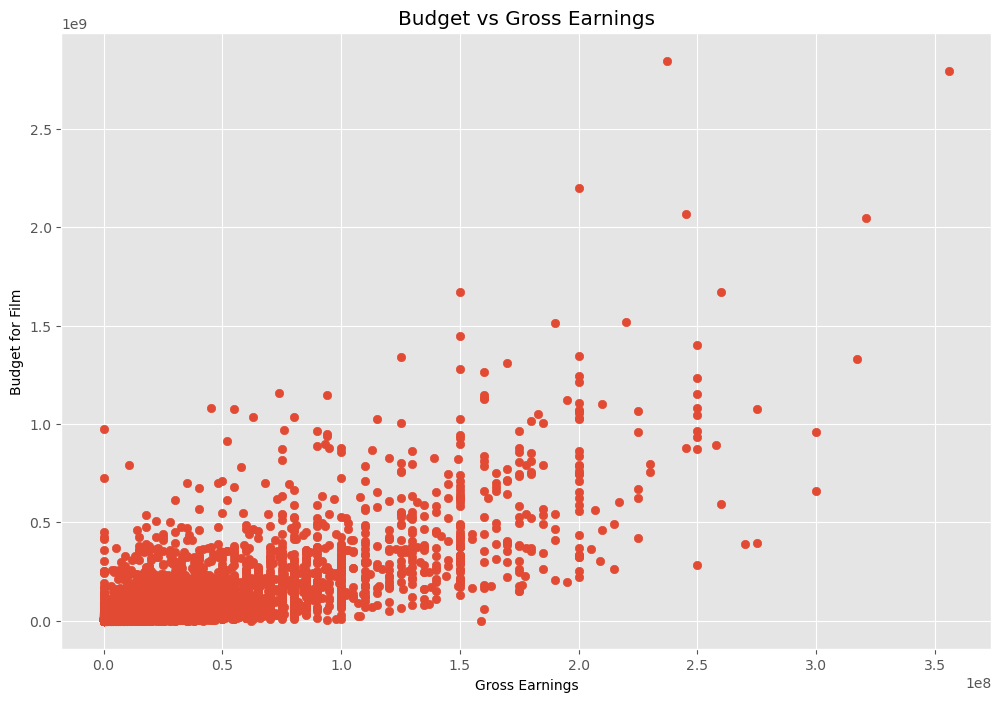

In [19]:
plt.scatter(x=df['budget'],y=df['gross'])

plt.title('Budget vs Gross Earnings')

plt.xlabel('Gross Earnings')

plt.ylabel('Budget for Film')

plt.show()

In [17]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,format_released,yearcorrect
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0,1980-06-13,1980
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0,1980-07-02,1980
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0,1980-06-20,1980
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0,1980-07-02,1980
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0,1980-07-25,1980


In [18]:
df = df.sort_values(by=['gross'], inplace=False, ascending=False)

df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,format_released,yearcorrect
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000.0,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,NaN,162.0,2009-12-18,2009
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,NaN,181.0,2019-04-26,2019
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000.0,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,NaN,194.0,1997-12-19,1997
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000.0,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,NaN,138.0,2015-12-18,2015
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,NaN,149.0,2018-04-27,2018


<Axes: xlabel='budget', ylabel='gross'>

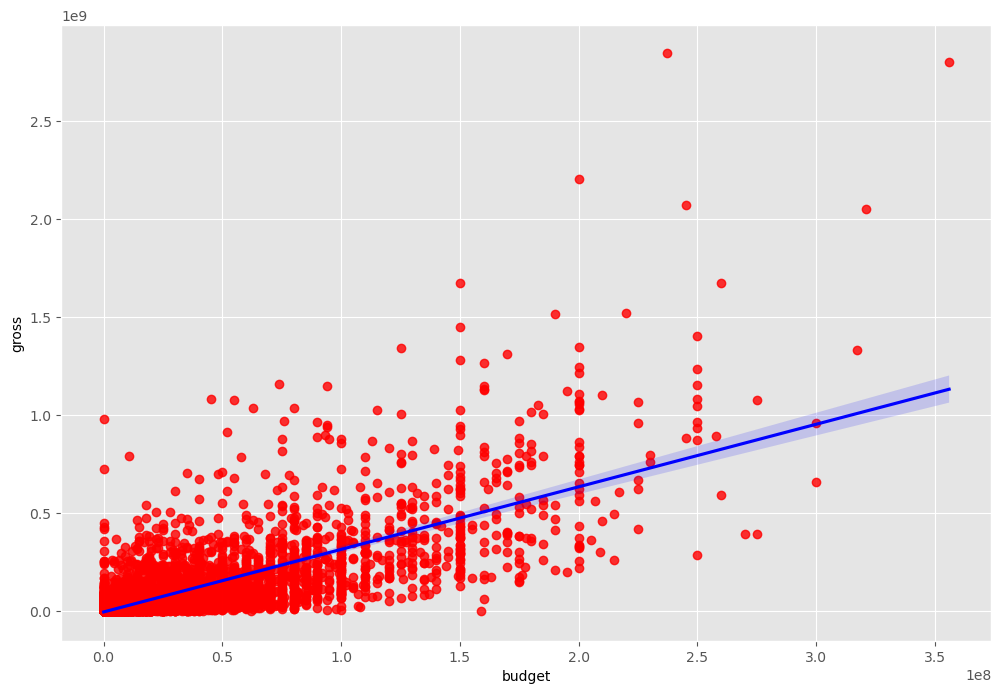

In [21]:
# plot budget vs gross using seaborn

sns.regplot(x='budget', y='gross', data=df, scatter_kws={"color":"red"}, line_kws={"color":"blue"})


In [33]:
# Look at correlation

df.corr(method='pearson') # pearson,kendall,spearman

df.corr(numeric_only = True)


/var/folders/1w/46c6dxs12hx7dj6zb8n4w23h0000gp/T/ipykernel_45913/585408185.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr(method='pearson') # pearson,kendall,spearman


,year,score,votes,budget,gross,runtime
year,1.000000,0.097995,0.222945,0.309212,0.261900,0.120811
score,0.097995,1.000000,0.409182,0.055665,0.186392,0.399451
votes,0.222945,0.409182,1.000000,0.486862,0.632834,0.309212
budget,0.309212,0.055665,0.486862,1.000000,0.750157,0.269510
gross,0.261900,0.186392,0.632834,0.750157,1.000000,0.245235
runtime,0.120811,0.399451,0.309212,0.269510,0.245235,1.000000


/var/folders/1w/46c6dxs12hx7dj6zb8n4w23h0000gp/T/ipykernel_45913/2731287216.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr(method='pearson')


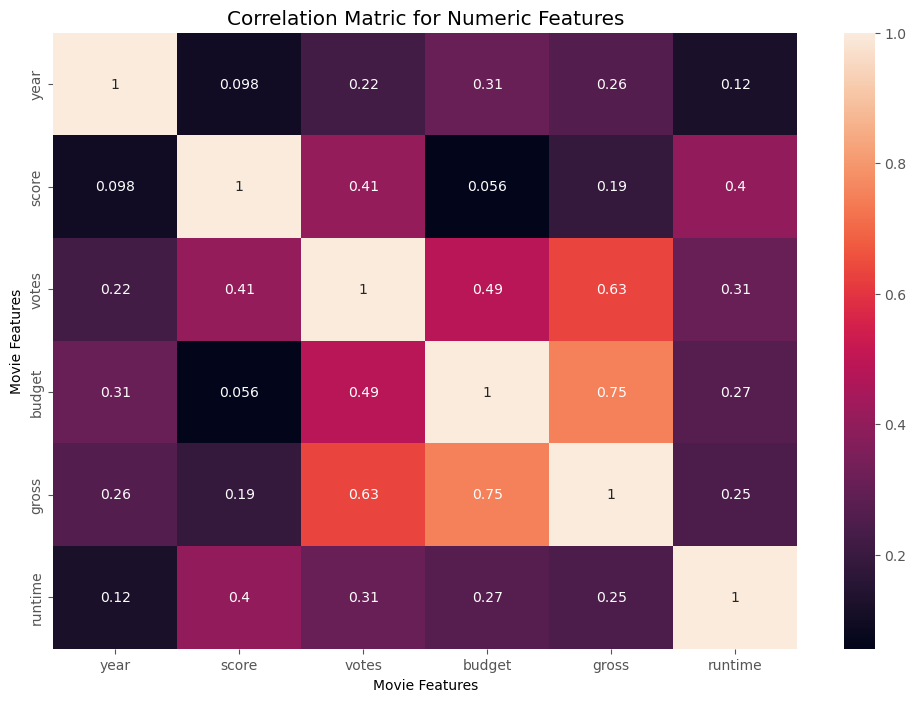

In [34]:
# high correlation between budget and gross

correlation_matrix = df.corr(method='pearson')

sns.heatmap(correlation_matrix, annot=True)

plt.title('Correlation Matric for Numeric Features')

plt.xlabel('Movie Features')

plt.ylabel('Movie Features')

plt.show()

In [38]:
# Look at company

df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,format_released,yearcorrect
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000.0,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,NaN,162.0,2009-12-18,2009
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,NaN,181.0,2019-04-26,2019
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000.0,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,NaN,194.0,1997-12-19,1997
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000.0,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,NaN,138.0,2015-12-18,2015
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,NaN,149.0,2018-04-27,2018


In [39]:
# Using factorize - this assigns a random numeric value for each unique categorical value

df.apply(lambda x: x.factorize()[0]).corr(method='pearson')


,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,format_released,yearcorrect
name,1.000000,0.303939,0.138367,0.253906,0.654708,0.107033,0.595709,0.720119,0.782765,0.652683,0.190638,0.111217,0.978147,0.544865,0.071772,0.525403,0.256430
rating,0.303939,1.000000,-0.012156,0.037943,0.237091,-0.065634,0.118612,0.235155,0.256080,0.243749,0.158906,0.087313,0.310789,0.214554,0.033214,0.156532,0.030601
genre,0.138367,-0.012156,1.000000,0.087977,0.091335,0.063222,0.148546,0.093457,0.088163,0.098061,-0.073897,0.101274,0.134001,0.053408,0.005585,0.101554,0.085155
year,0.253906,0.037943,0.087977,1.000000,0.316020,0.076737,0.326475,0.173235,0.212293,0.227655,-0.053654,0.060244,0.266957,0.091890,0.032916,0.386133,0.935420
released,0.654708,0.237091,0.091335,0.316020,1.000000,0.069218,0.450235,0.502899,0.547861,0.476127,0.162192,0.081224,0.668367,0.381801,0.048272,0.821622,0.329419
score,0.107033,-0.065634,0.063222,0.076737,0.069218,1.000000,0.233438,0.149666,0.103866,0.106351,-0.098455,0.001150,0.113338,0.017782,0.035609,0.104861,0.083827
votes,0.595709,0.118612,0.148546,0.326475,0.450235,0.233438,1.000000,0.495005,0.521115,0.451158,0.050876,0.038523,0.611780,0.313272,0.067696,0.424035,0.324622
director,0.720119,0.235155,0.093457,0.173235,0.502899,0.149666,0.495005,1.000000,0.696031,0.580146,0.197110,0.043335,0.737284,0.497573,0.080150,0.395940,0.175311
writer,0.782765,0.256080,0.088163,0.212293,0.547861,0.103866,0.521115,0.696031,1.000000,0.589832,0.201882,0.064136,0.797703,0.500813,0.057754,0.434821,0.209642
star,0.652683,0.243749,0.098061,0.227655,0.476127,0.106351,0.451158,0.580146,0.589832,1.000000,0.221251,0.064888,0.669416,0.480031,0.072543,0.381058,0.232177


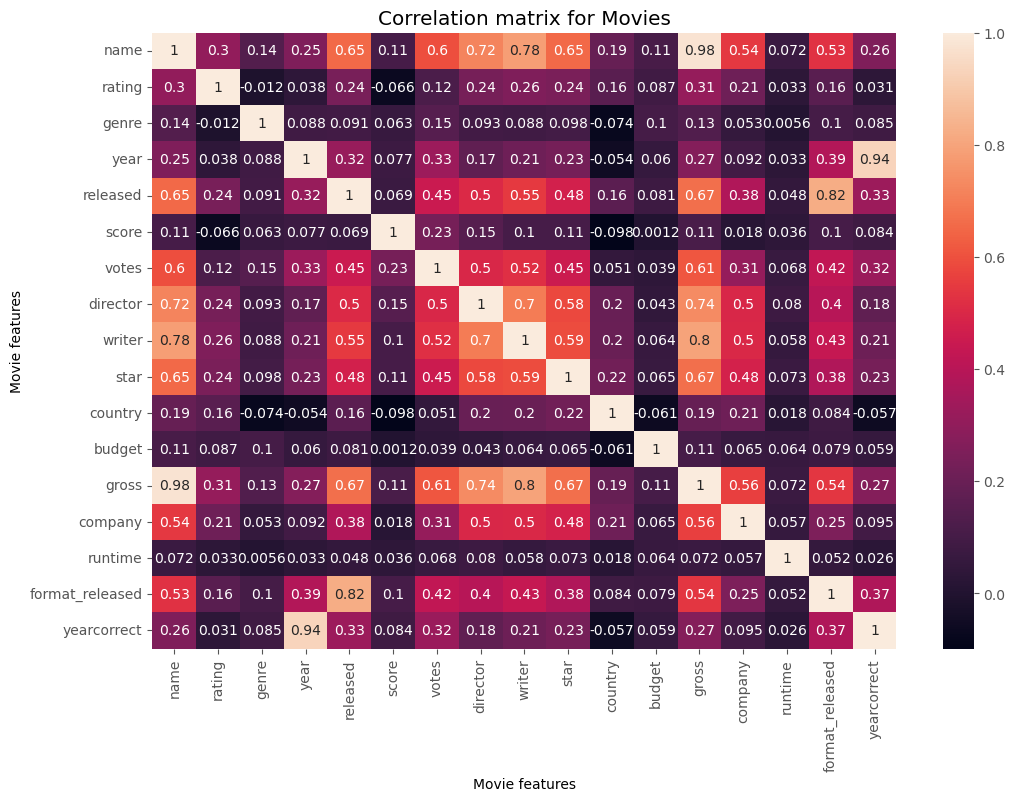

In [40]:
correlation_matrix = df.apply(lambda x: x.factorize()[0]).corr(method='pearson')

sns.heatmap(correlation_matrix, annot = True)

plt.title("Correlation matrix for Movies")

plt.xlabel("Movie features")

plt.ylabel("Movie features")

plt.show()

In [75]:
correlation_mat = df.apply(lambda x: x.factorize()[0]).corr()

corr_pairs = correlation_mat.unstack()

print(corr_pairs)

df.head()

name             name               1.000000
                 rating             0.344538
                 genre              0.138367
                 year               0.256430
                 released           0.656262
                 score              0.107033
                 votes              0.595709
                 director           0.720119
                 writer             0.782929
                 star               0.653260
                 country            0.193910
                 budget             0.111217
                 gross              0.978147
                 company            0.544865
                 runtime            0.071772
                 format_released    0.525403
                 yearcorrect        0.256430
                 Year               0.256430
rating           name               0.344538
                 rating             1.000000
                 genre             -0.014784
                 year               0.028958
          

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,format_released,yearcorrect,Year
5445,533,5,0,29,696,7.8,1100000.0,1155,1778,2334,55,237000000,2847246203,-1,162.0,2009-12-18,29,2009
7445,535,5,0,39,183,8.4,903000.0,162,743,2241,55,356000000,2797501328,-1,181.0,2019-04-26,39,2019
3045,6896,5,6,17,704,7.8,1100000.0,1155,1778,1595,55,200000000,2201647264,-1,194.0,1997-12-19,17,1997
6663,5144,5,0,35,698,7.8,876000.0,1125,2550,524,55,245000000,2069521700,-1,138.0,2015-12-18,35,2015
7244,536,5,0,38,192,8.4,897000.0,162,743,2241,55,321000000,2048359754,-1,149.0,2018-04-27,38,2018


In [74]:
sorted_pairs = corr_pairs.sort_values(kind="quicksort")

print(sorted_pairs)

df.head()

country          score             -0.098455
score            country           -0.098455
genre            country           -0.073897
country          genre             -0.073897
score            rating            -0.065634
rating           score             -0.065634
country          budget            -0.061499
budget           country           -0.061499
yearcorrect      country           -0.057396
country          yearcorrect       -0.057396
                 year              -0.053654
year             country           -0.053654
rating           genre             -0.012156
genre            rating            -0.012156
budget           score              0.001150
score            budget             0.001150
runtime          genre              0.005585
genre            runtime            0.005585
runtime          country            0.017505
country          runtime            0.017505
company          score              0.017782
score            company            0.017782
yearcorrec

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,format_released,yearcorrect,Year
5445,533,5,0,29,696,7.8,1100000.0,1155,1778,2334,55,237000000,2847246203,-1,162.0,2009-12-18,29,2009
7445,535,5,0,39,183,8.4,903000.0,162,743,2241,55,356000000,2797501328,-1,181.0,2019-04-26,39,2019
3045,6896,5,6,17,704,7.8,1100000.0,1155,1778,1595,55,200000000,2201647264,-1,194.0,1997-12-19,17,1997
6663,5144,5,0,35,698,7.8,876000.0,1125,2550,524,55,245000000,2069521700,-1,138.0,2015-12-18,35,2015
7244,536,5,0,38,192,8.4,897000.0,162,743,2241,55,321000000,2048359754,-1,149.0,2018-04-27,38,2018


In [73]:
# look at the ones that have a high correlation (> 0.5)

strong_pairs = sorted_pairs[abs(sorted_pairs) > 0.5]

print(strong_pairs)

df.head()

company          writer             0.500813
writer           company            0.500813
director         released           0.502899
released         director           0.502899
writer           votes              0.521115
votes            writer             0.521115
name             format_released    0.525403
format_released  name               0.525403
                 gross              0.537325
gross            format_released    0.537325
company          name               0.544865
name             company            0.544865
released         writer             0.547861
writer           released           0.547861
company          gross              0.559599
gross            company            0.559599
star             director           0.580146
director         star               0.580146
writer           star               0.589832
star             writer             0.589832
votes            name               0.595709
name             votes              0.595709
votes     

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,format_released,yearcorrect,Year
5445,533,5,0,29,696,7.8,1100000.0,1155,1778,2334,55,237000000,2847246203,-1,162.0,2009-12-18,29,2009
7445,535,5,0,39,183,8.4,903000.0,162,743,2241,55,356000000,2797501328,-1,181.0,2019-04-26,39,2019
3045,6896,5,6,17,704,7.8,1100000.0,1155,1778,1595,55,200000000,2201647264,-1,194.0,1997-12-19,17,1997
6663,5144,5,0,35,698,7.8,876000.0,1125,2550,524,55,245000000,2069521700,-1,138.0,2015-12-18,35,2015
7244,536,5,0,38,192,8.4,897000.0,162,743,2241,55,321000000,2048359754,-1,149.0,2018-04-27,38,2018


In [72]:
# Look at the top 15 compaies by gross revenue

CompanyGrossSum = df.groupby('company')[["gross"]].sum()

CompanyGrossSumSorted = CompanyGrossSum.sort_values('gross', ascending = False)[:15]

CompanyGrossSumSorted = CompanyGrossSumSorted['gross'].astype('int64') 

CompanyGrossSumSorted

company
-1       510882049538
 1606      1518815515
 1313      1159444662
 1008       966554929
 304        880681519
 294        856085151
 1266       814044001
 651        759056935
 1396       758411779
 721        726264074
 1605       714421503
 2172       711025481
 636        710644566
 370        699992512
 147        542358331
Name: gross, dtype: int64

In [69]:
df['Year'] = df['format_released'].astype(str).str[:4]
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,format_released,yearcorrect,Year
5445,533,5,0,29,696,7.8,1100000.0,1155,1778,2334,55,237000000,2847246203,-1,162.0,2009-12-18,29,2009
7445,535,5,0,39,183,8.4,903000.0,162,743,2241,55,356000000,2797501328,-1,181.0,2019-04-26,39,2019
3045,6896,5,6,17,704,7.8,1100000.0,1155,1778,1595,55,200000000,2201647264,-1,194.0,1997-12-19,17,1997
6663,5144,5,0,35,698,7.8,876000.0,1125,2550,524,55,245000000,2069521700,-1,138.0,2015-12-18,35,2015
7244,536,5,0,38,192,8.4,897000.0,162,743,2241,55,321000000,2048359754,-1,149.0,2018-04-27,38,2018


In [70]:
df.groupby(['company', 'year'])[["gross"]].sum()
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,format_released,yearcorrect,Year
5445,533,5,0,29,696,7.8,1100000.0,1155,1778,2334,55,237000000,2847246203,-1,162.0,2009-12-18,29,2009
7445,535,5,0,39,183,8.4,903000.0,162,743,2241,55,356000000,2797501328,-1,181.0,2019-04-26,39,2019
3045,6896,5,6,17,704,7.8,1100000.0,1155,1778,1595,55,200000000,2201647264,-1,194.0,1997-12-19,17,1997
6663,5144,5,0,35,698,7.8,876000.0,1125,2550,524,55,245000000,2069521700,-1,138.0,2015-12-18,35,2015
7244,536,5,0,38,192,8.4,897000.0,162,743,2241,55,321000000,2048359754,-1,149.0,2018-04-27,38,2018


In [50]:
CompanyGrossSum = df.groupby(['company', 'year'])[["gross"]].sum()

CompanyGrossSumSorted = CompanyGrossSum.sort_values(['gross','company','year'], ascending = False)[:15]

CompanyGrossSumSorted = CompanyGrossSumSorted['gross'].astype('int64') 

CompanyGrossSumSorted

company                                                        year
Marvel Studios                                                 2012    1518815515
Illumination Entertainment                                     2015    1159444662
Fairview Entertainment                                         2016     966554929
B24                                                            2015     880681519
Avi Arad Productions                                           2018     856085151
Heyday Films                                                   2016     814044001
Chris Morgan Productions                                       2019     759056935
Jolie Pas                                                      2014     758411779
Coco Cartoon                                                   2019     726264074
Marvel Entertainment                                           2014     714421503
Temple Hill Entertainment                                      2009     711025481
Chernin Entertainment         

In [51]:
CompanyGrossSum = df.groupby(['company'])[["gross"]].sum()

CompanyGrossSumSorted = CompanyGrossSum.sort_values(['gross','company'], ascending = False)[:15]

CompanyGrossSumSorted = CompanyGrossSumSorted['gross'].astype('int64') 

CompanyGrossSumSorted

company
Marvel Studios                                                   1518815515
Illumination Entertainment                                       1159444662
Fairview Entertainment                                            966554929
B24                                                               880681519
Avi Arad Productions                                              856085151
Heyday Films                                                      814044001
Chris Morgan Productions                                          759056935
Jolie Pas                                                         758411779
Coco Cartoon                                                      726264074
Marvel Entertainment                                              714421503
Temple Hill Entertainment                                         711025481
Chernin Entertainment                                             710644566
Beijing Dengfeng International Culture Communications Company     699992512
Alli

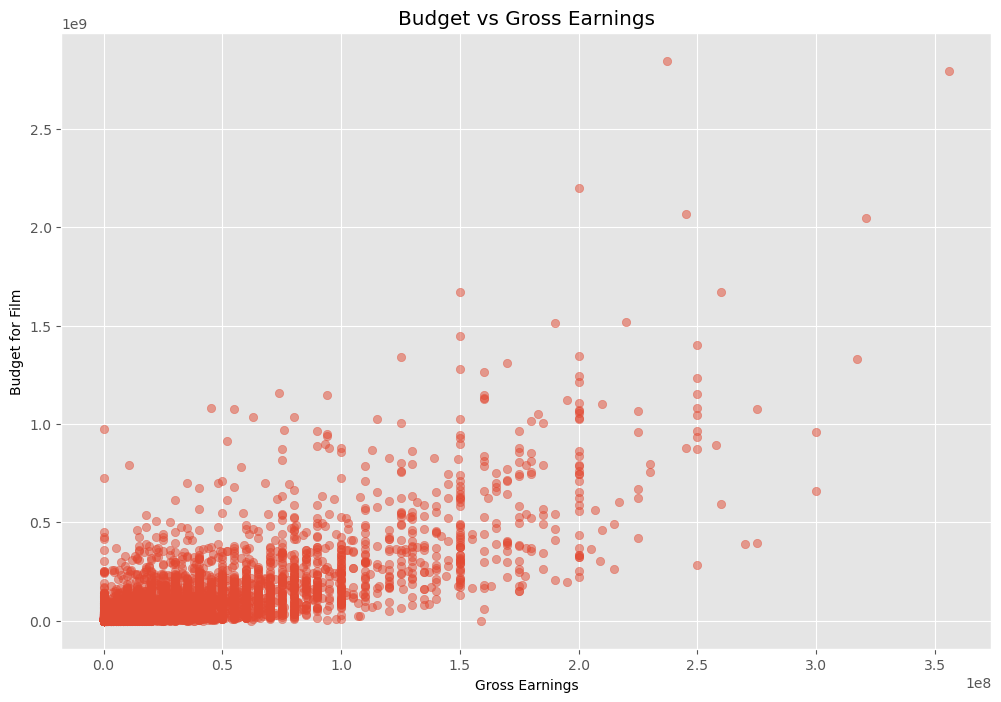

In [52]:
plt.scatter(x=df['budget'], y=df['gross'], alpha=0.5)
plt.title('Budget vs Gross Earnings')
plt.xlabel('Gross Earnings')
plt.ylabel('Budget for Film')
plt.show()

/Users/zhang.mengx/anaconda3/lib/python3.10/site-packages/seaborn/categorical.py:3544: UserWarning: 83.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/zhang.mengx/anaconda3/lib/python3.10/site-packages/seaborn/categorical.py:3544: UserWarning: 48.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/zhang.mengx/anaconda3/lib/python3.10/site-packages/seaborn/categorical.py:3544: UserWarning: 60.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/zhang.mengx/anaconda3/lib/python3.10/site-packages/seaborn/categorical.py:3544: UserWarning: 88.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/zhang.mengx/anaconda3/lib/python3.10/

<Axes: xlabel='rating', ylabel='gross'>

/Users/zhang.mengx/anaconda3/lib/python3.10/site-packages/seaborn/categorical.py:3544: UserWarning: 47.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/zhang.mengx/anaconda3/lib/python3.10/site-packages/seaborn/categorical.py:3544: UserWarning: 86.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/zhang.mengx/anaconda3/lib/python3.10/site-packages/seaborn/categorical.py:3544: UserWarning: 89.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/zhang.mengx/anaconda3/lib/python3.10/site-packages/seaborn/categorical.py:3544: UserWarning: 96.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


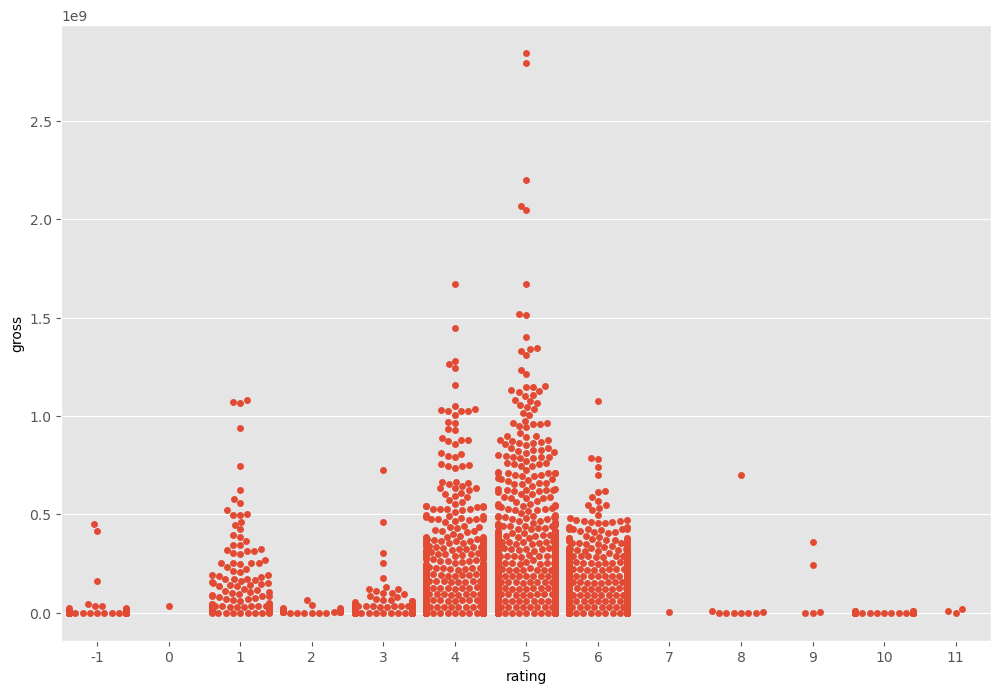

In [67]:
sns.swarmplot(x="rating", y="gross", data=df)

<Axes: xlabel='rating', ylabel='gross'>

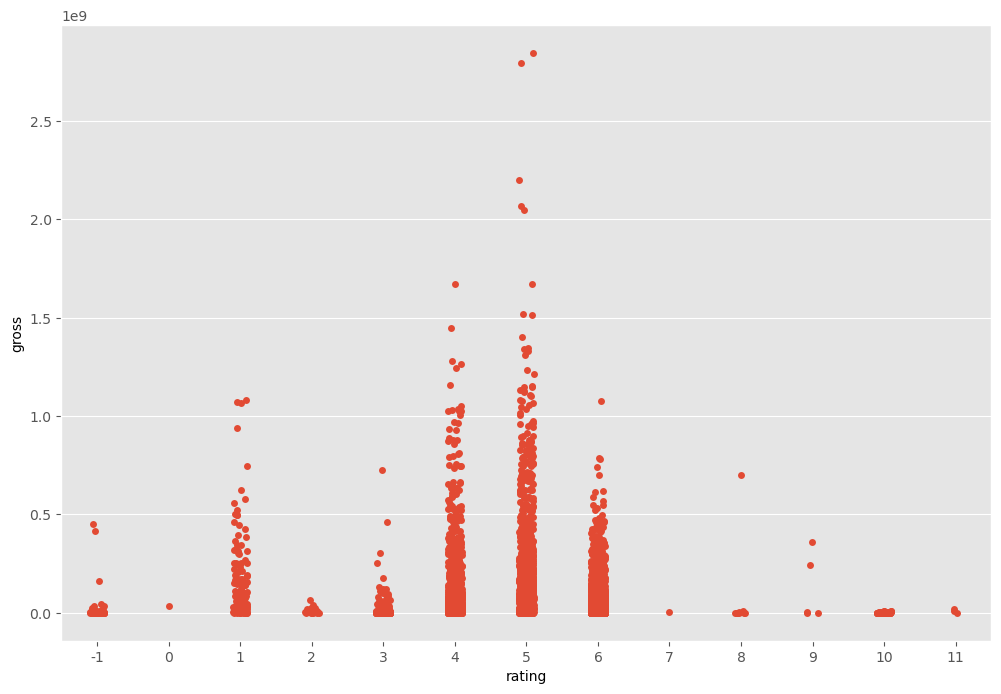

In [68]:
sns.stripplot(x="rating", y="gross", data=df)